In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir("..")

In [3]:
from scripts.run_data_value_ratio_experiments import AGGS, LABELED_SWEEP, UNLABELED_SWEEP
from utils import get_budgets, data_value_ratios

In [4]:
n_us = get_budgets(UNLABELED_SWEEP)
n_ls = get_budgets(LABELED_SWEEP)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


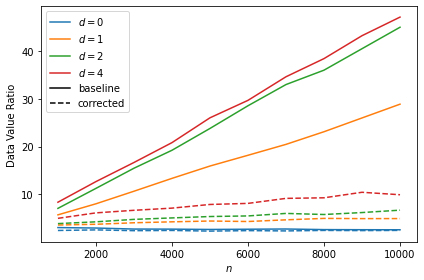

In [5]:
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]
lines = []
start_idx = 9

for i, d in enumerate([0, 1, 2, 4]):
    unlabeled_losses_mean = np.load(f"results/data_value_ratio_results_d={d}/unlabeled_losses_mean.npy")
    unlabeled_losses_median = np.load(f"results/data_value_ratio_results_d={d}/unlabeled_losses_median.npy")
    labeled_losses = np.load(f"results/data_value_ratio_results_d={d}/labeled_losses.npy")
    
    data_value_ratios_mean = data_value_ratios(unlabeled_losses_mean, n_us, labeled_losses, n_ls)
    lines.append(plt.plot(n_us[start_idx:], data_value_ratios_mean[start_idx:], label=rf"$d={d}$", ls="solid", color=colors[i]))
    
    data_value_ratios_median = data_value_ratios(unlabeled_losses_median, n_us, labeled_losses, n_ls)
    plt.plot(n_us[start_idx:], data_value_ratios_median[start_idx:], ls="dashed", color=colors[i])

plt.plot([], color="black", label="baseline")
plt.plot([], color="black", ls="dashed", label="corrected")
    
plt.legend()
plt.ylabel("Data Value Ratio")
plt.xlabel(r"$n$")
plt.tight_layout()
plt.savefig("figures/data_value_ratios.eps", format="eps")
plt.show()